In [13]:
import json
import pathlib

import numpy as np
import cv2

from src.monopoly.elements import deserialize_families, deserialize_fields, FieldIndex
from src.processing import Homographer, ImageMatcher, BoardMapper
from src.display import showarray

from dataclasses import dataclass

In [14]:
serialized_families = json.loads(pathlib.Path("data/meta/families.json").read_text())
serialized_fields = json.loads(pathlib.Path("data/meta/fields.json").read_text())

families = {family.name: family for family in deserialize_families(serialized_families)}
fields = list(deserialize_fields(serialized_fields, families))
field_index = FieldIndex(fields)

In [15]:
board_img = cv2.imread("data/images/board.jpg")
rotated_img = cv2.imread("data/images/photo_board_rotated.jpg")

In [22]:
image_matcher = ImageMatcher(board_img, rotated_img)
matches = image_matcher.get_matches()
homographer = Homographer(image_matcher.kp_ref, image_matcher.kp_match, matches)
homography, _ = homographer.get_inverse_homography()
board_mapper = BoardMapper(homography, max(board_img.shape))

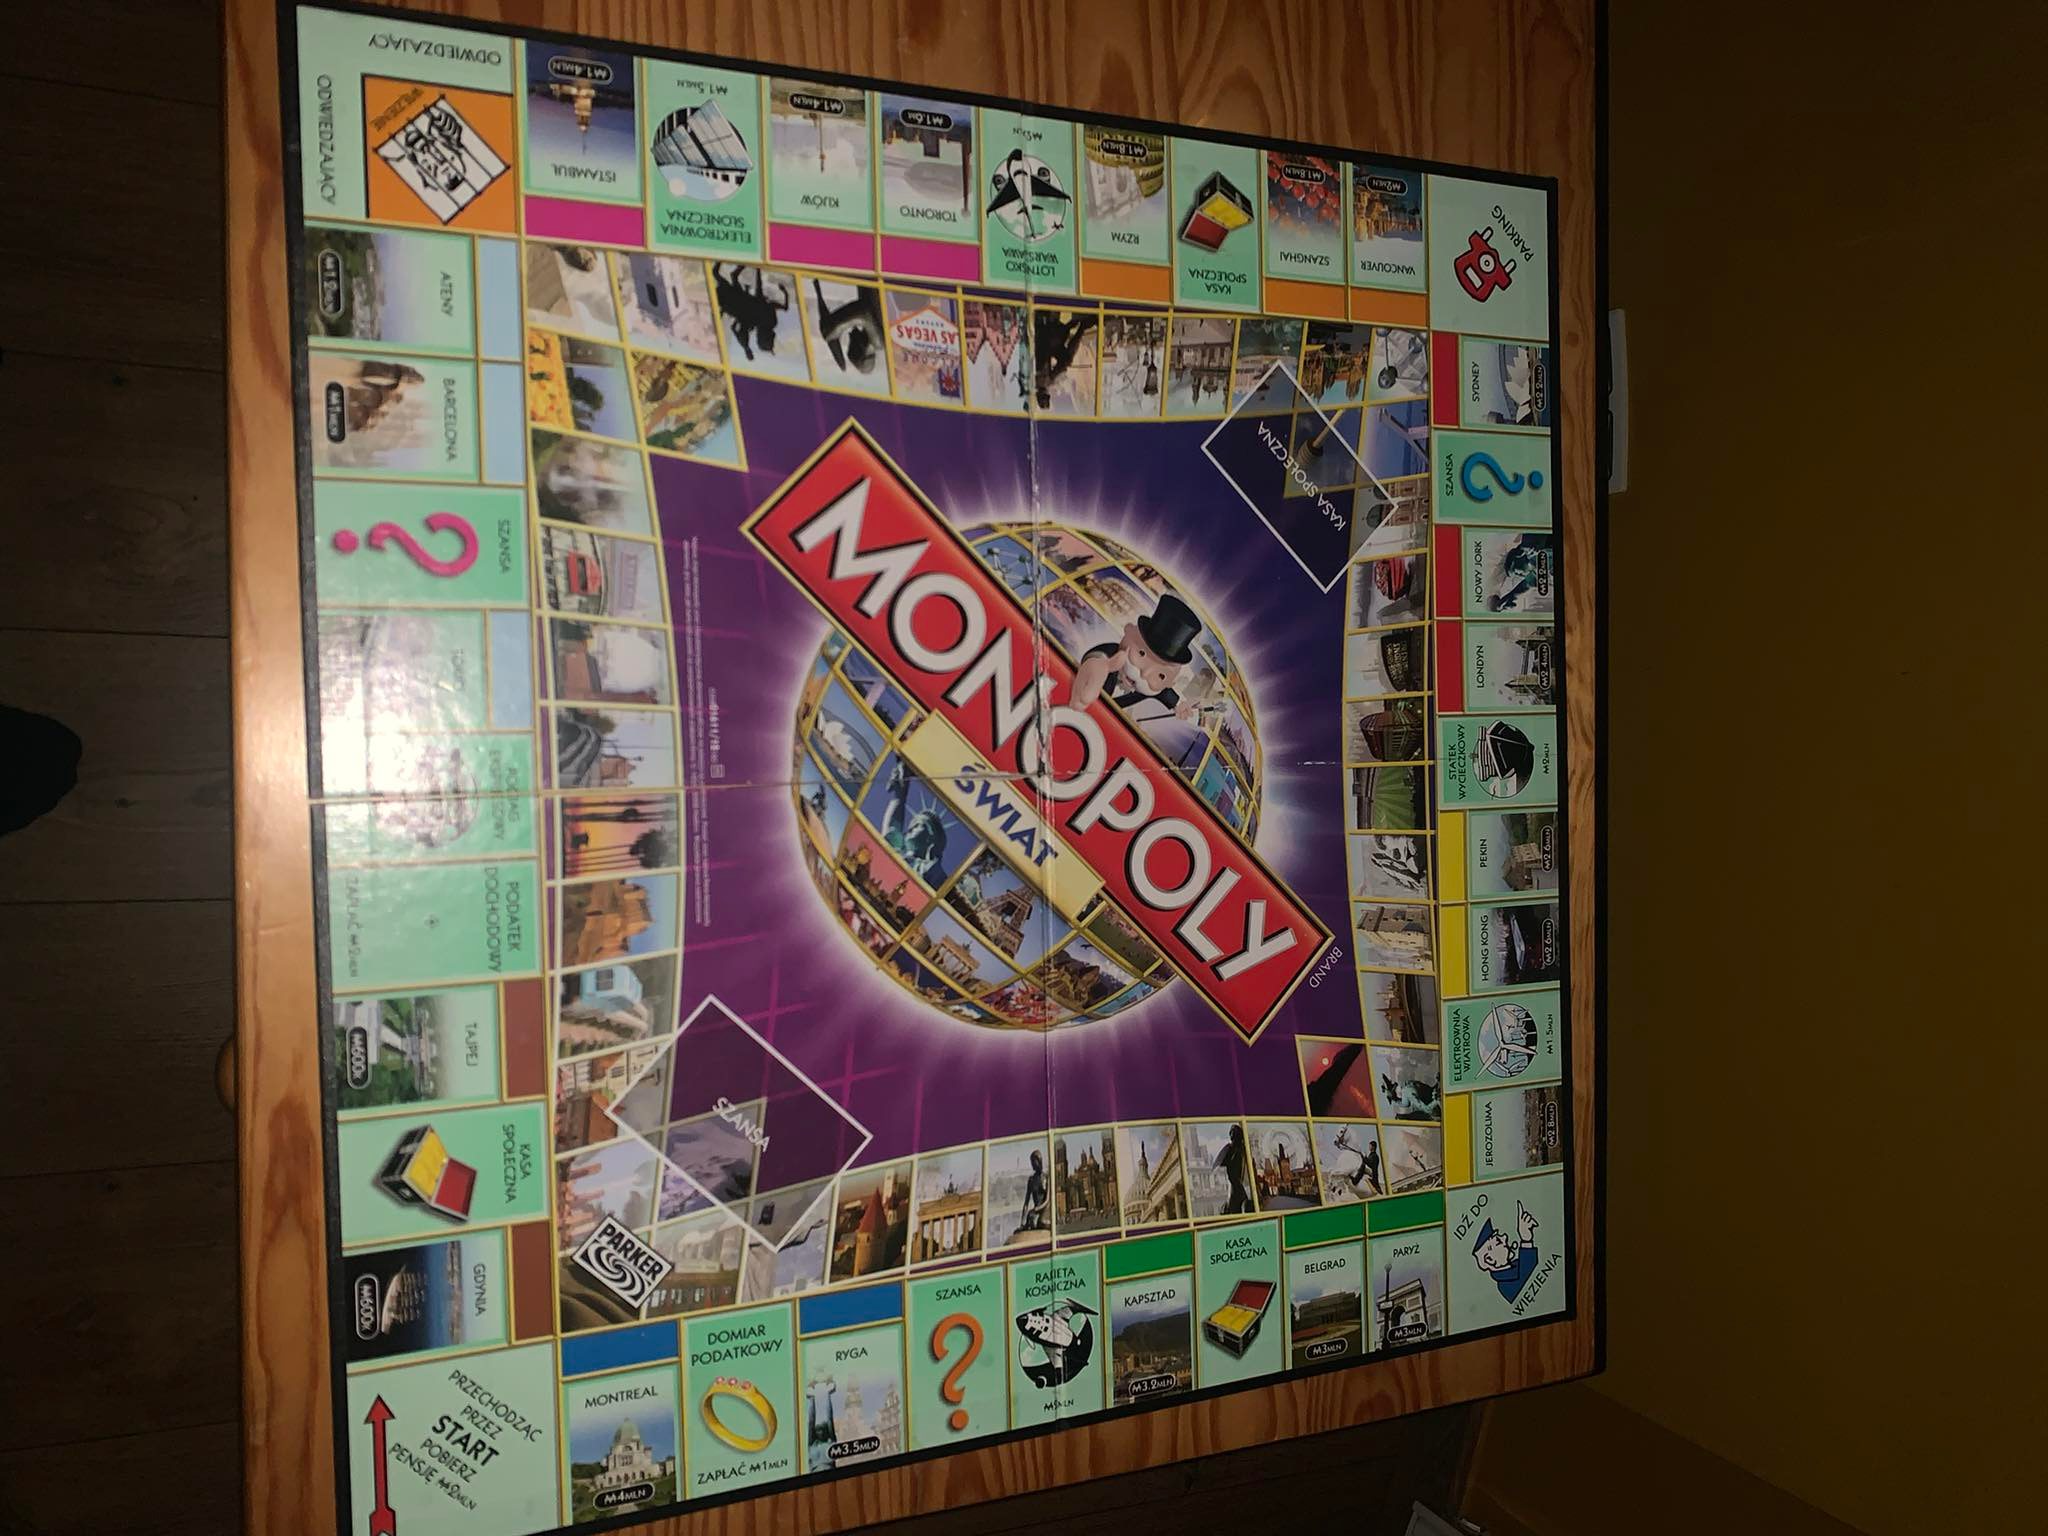

In [23]:
showarray(rotated_img)

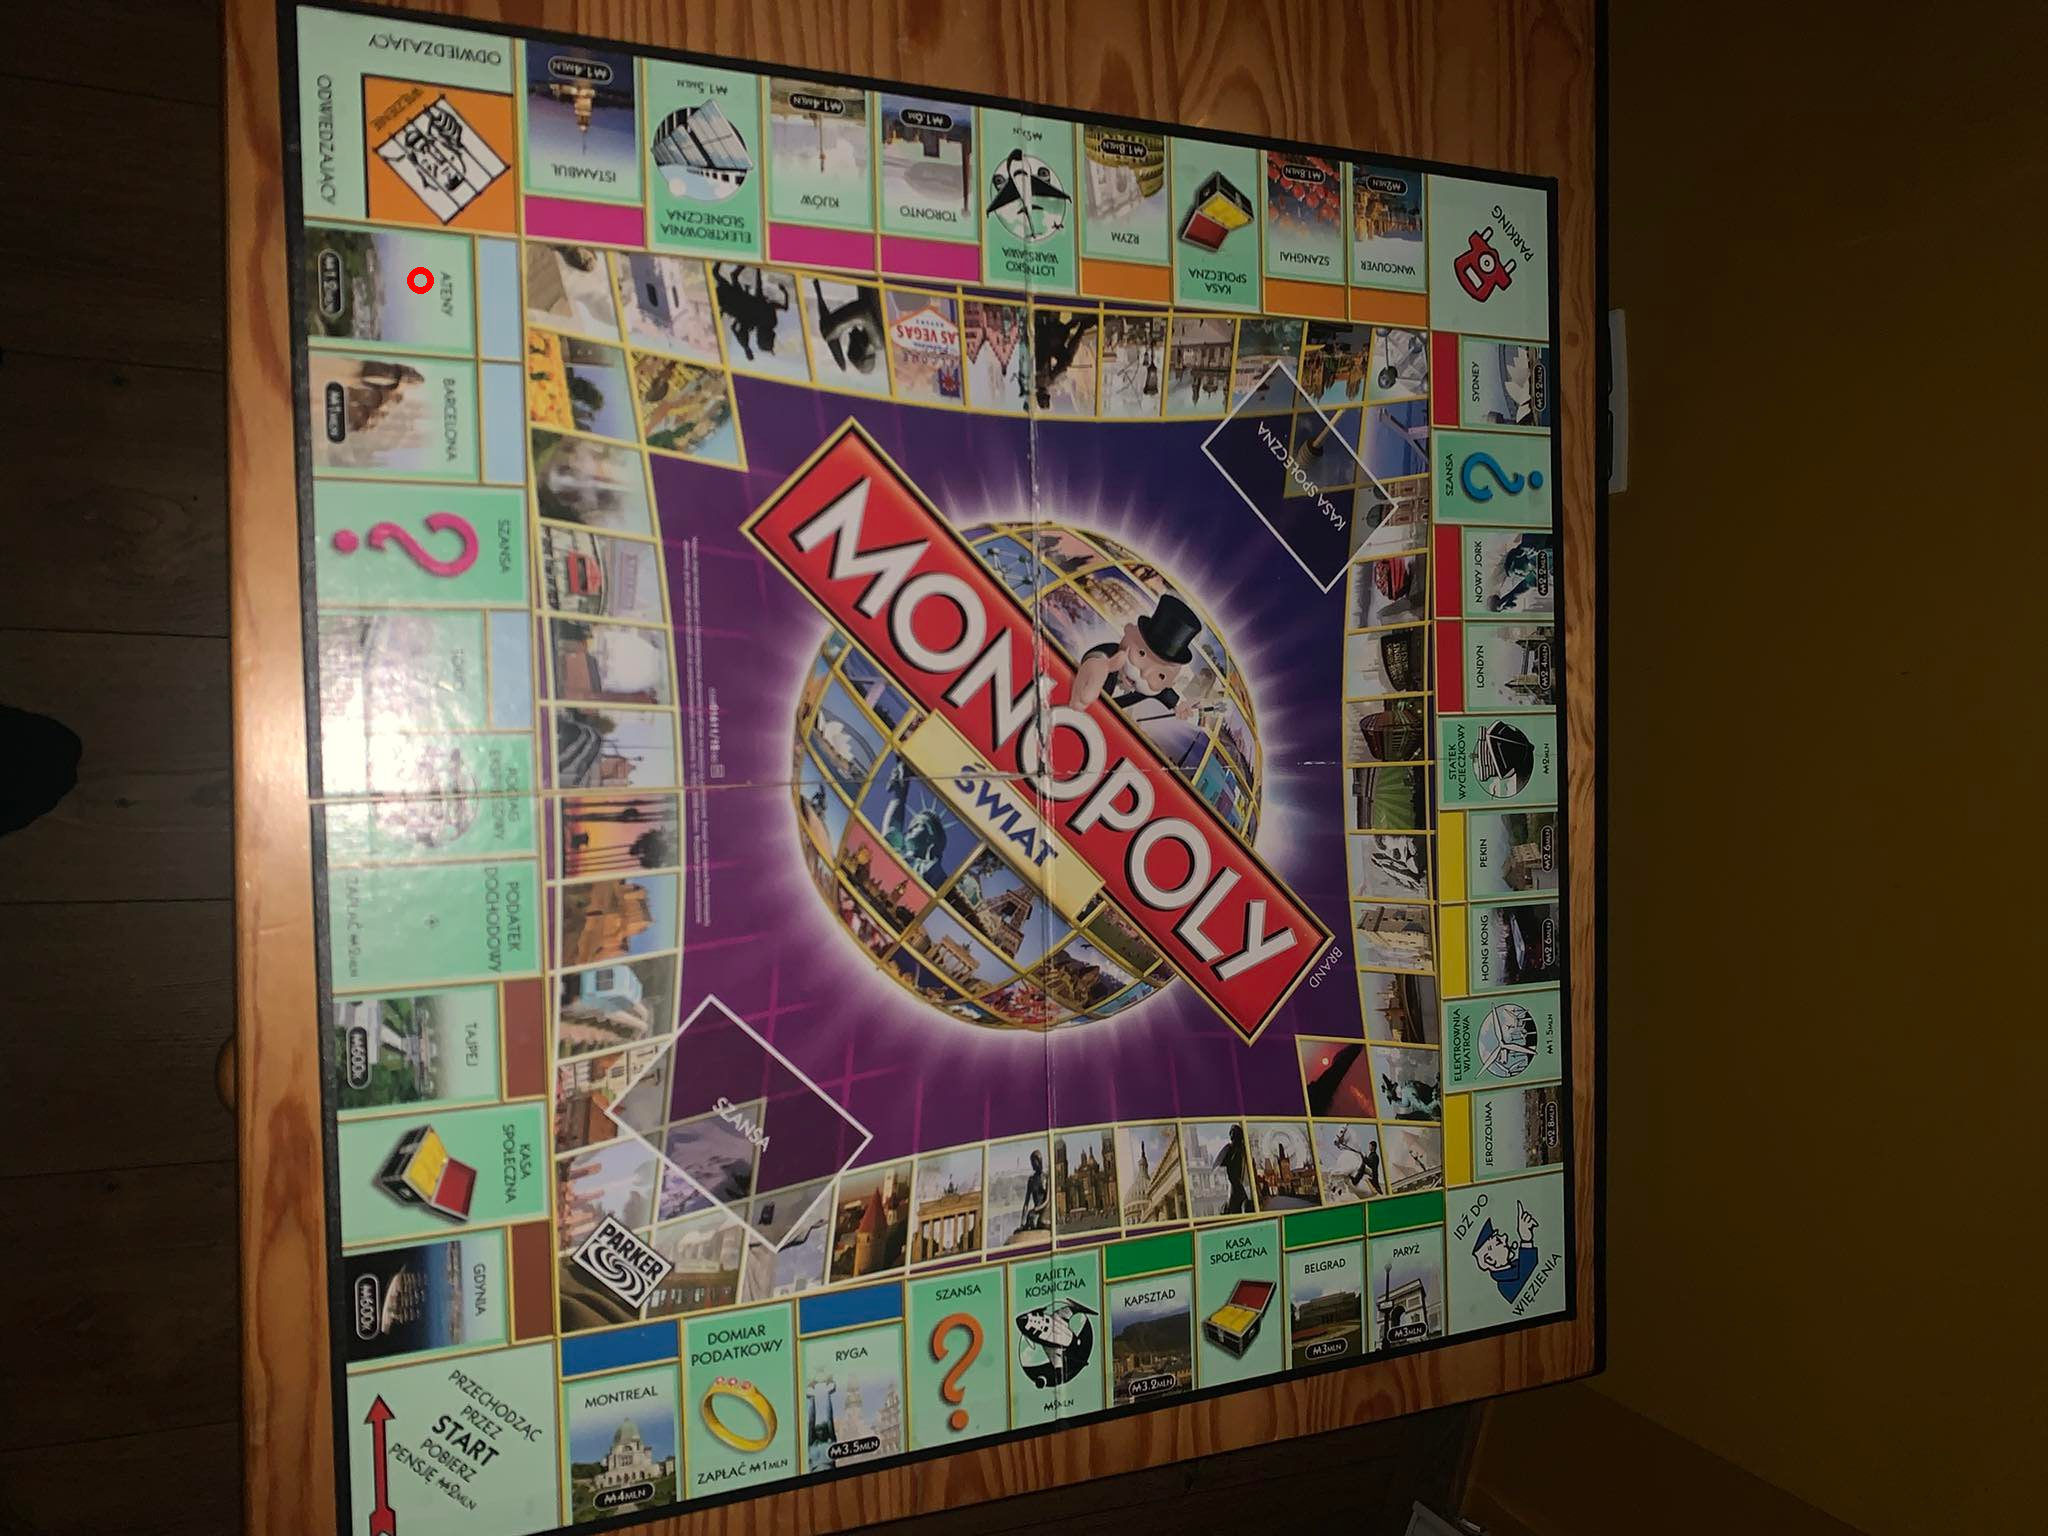

In [24]:
selected_point = (420, 280)
rotated_img_with_selection = cv2.circle(rotated_img.copy(), selected_point, 10, (0, 0, 255), 5)
showarray(rotated_img_with_selection)

In [25]:
section, index = board_mapper.map_point_to_field_position(*selected_point)
section, index

('bottom', 0)

In [26]:
field_index.get_by_place(section, index)

RentableField(id=9, name='Athens', family=Family(name='lightblue'), placement='bottom', index=0, price=1.2, rent=[0.08, 0.4, 1, 3, 4.5, 6], mortgage=0.6)